In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Mini Project: Perform Multiple Linear Regression

## Overview
This project focuses on using multiple linear regression to analyze the relationship between sales and various marketing promotion strategies. By leveraging multiple independent variables, such as TV, social media, radio, and influencer promotions, we aim to build a predictive model that estimates sales based on these factors. This project will cover the complete data science pipeline, including data exploration, preprocessing, model building, evaluation, and interpretation.

## Objective
Develop a multiple linear regression model to predict sales based on marketing promotion data. The project will involve exploring the dataset, selecting relevant independent variables, fitting the model, checking assumptions, and interpreting the results to provide actionable insights.

## Learning Outcomes
1. Understand the concept of multiple linear regression and its applications.
2. Learn to preprocess and explore data for regression analysis.
3. Gain experience in fitting and evaluating a multiple linear regression model.
4. Check and validate regression assumptions.
5. Interpret model coefficients and communicate results to stakeholders.

---


## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. The goal is to predict sales based on various marketing promotion strategies, which can help the business optimize its marketing efforts and allocate resources effectively.

### Mini-task:
Write a brief paragraph on how predicting sales using multiple linear regression can benefit the business.

---

## Step 2: Data Collection
### Task:
Collect the dataset required for building the regression model. The dataset used in this project is `marketing_sales_data.csv`, which contains information about TV, social media, radio, and influencer promotions, along with sales data.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first five rows.

```python
import pandas as pd

# Load the dataset
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows
### YOUR CODE HERE ###
```

---

In [2]:
import pandas as pd
# load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3mtt-AI ML/3mtt-AIML-MINI-PROJECT/marketing_sales_data.csv")

# displaying the first 5 rows
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


In [ ]:
# Import Data Files from Google Drive

import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1WChLou3qt_JaPjYLZBMHJ8WxSssQ-enL/view?usp=drive_link"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of variables, identify relationships between variables, and prepare the data for modeling.

### Mini-task:
Create a pairplot to visualize the relationships between continuous variables in the dataset.

#### Hint:
Use `seaborn.pairplot()` to create a pairplot of the continuous variables.

```python
import seaborn as sns

# Create a pairplot of the continuous variables
### YOUR CODE HERE ###
```

---

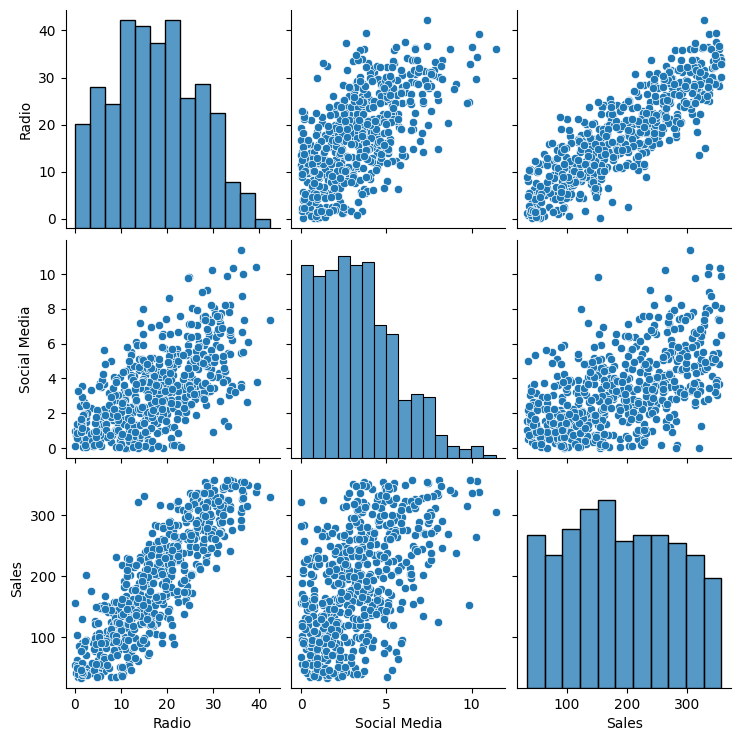

In [4]:
import seaborn as sns

# Create a pairplot of the continuous variables
sns.pairplot(data);


## Step 4: Data Preparation
### Task:
Prepare the data for regression analysis by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### Mini-task:
Drop rows with missing values and encode categorical variables if necessary.

#### Hint:
Use `data.dropna()` to remove rows with missing values and `pd.get_dummies()` to encode categorical variables.

```python
# Drop rows with missing values
### YOUR CODE HERE ###

# Encode categorical variables (if needed)
### YOUR CODE HERE ###
```

---

In [5]:
data.dtypes

,0
TV,object
Radio,float64
Social Media,float64
Influencer,object
Sales,float64


In [3]:
# since i have two categorical data i need to encode them

# Drop rows with missing values

data.dropna(inplace=True)

# Encode categorical variables (if needed)
data = pd.get_dummies(data)
data

,Radio,Social Media,Sales,TV_High,TV_Low,TV_Medium,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,3.518070,2.293790,55.261284,False,True,False,False,False,True,False
1,7.756876,2.572287,67.574904,False,True,False,False,True,False,False
2,20.348988,1.227180,272.250108,True,False,False,False,False,True,False
3,20.108487,2.728374,195.102176,False,False,True,False,True,False,False
4,31.653200,7.776978,273.960377,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
567,14.656633,3.817980,191.521266,False,False,True,False,False,True,False
568,28.110171,7.358169,297.626731,True,False,False,False,True,False,False
569,11.401084,5.818697,145.416851,False,False,True,False,False,False,True
570,21.119991,5.703028,209.326830,False,False,True,True,False,False,False



## Step 4: Data Preparation
### Task:
Prepare the data for regression analysis by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### Mini-task:
Drop rows with missing values and encode categorical variables if necessary.

#### Hint:
Use `data.dropna()` to remove rows with missing values and `pd.get_dummies()` to encode categorical variables.

```python
# Drop rows with missing values
### YOUR CODE HERE ###

# Encode categorical variables (if needed)
### YOUR CODE HERE ###
```

---

## Step 5: Model Building
### Task:
Fit a multiple linear regression model to predict sales using the selected independent variables.

### Mini-task:
Define the OLS formula and fit the model using the `statsmodels` library.

#### Hint:
Use `statsmodels.formula.api.ols()` to define the model and fit it to the data.

```python
import statsmodels.formula.api as smf

# Define the OLS formula
### YOUR CODE HERE ###

# Fit the model
### YOUR CODE HERE ###

# Display the model summary
### YOUR CODE HERE ###
```

---

In [6]:
data.head(1)

,Radio,Social Media,Sales,TV_High,TV_Low,TV_Medium,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,3.51807,2.29379,55.261284,False,True,False,False,False,True,False


In [13]:
import statsmodels.formula.api as smf

# Define the OLS formula
data = data.rename(columns={"Social Media": "Social_Media"})
formula = "Sales ~ Radio + Social_Media + TV_High + TV_Low + TV_Medium + Influencer_Macro + Influencer_Mega + Influencer_Micro + Influencer_Nano"

# Fit the model
model = smf.ols(formula=formula, data=data)
result = model.fit()

# Display the model summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Mon, 31 Mar 2025   Prob (F-statistic):          1.82e-282
Time:                        06:21:04   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Step 6: Model Evaluation
### Task:
Evaluate the model by checking the regression assumptions, including linearity, independence, normality, constant variance, and multicollinearity.

### Mini-task:
Create scatterplots to check the linearity assumption and calculate the residuals to check the normality assumption.

#### Hint:
Use `seaborn.scatterplot()` to create scatterplots and `statsmodels.qqplot()` to check the normality of residuals.

```python
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create scatterplots for linearity
### YOUR CODE HERE ###

# Calculate residuals and create a Q-Q plot
### YOUR CODE HERE ###
```

---

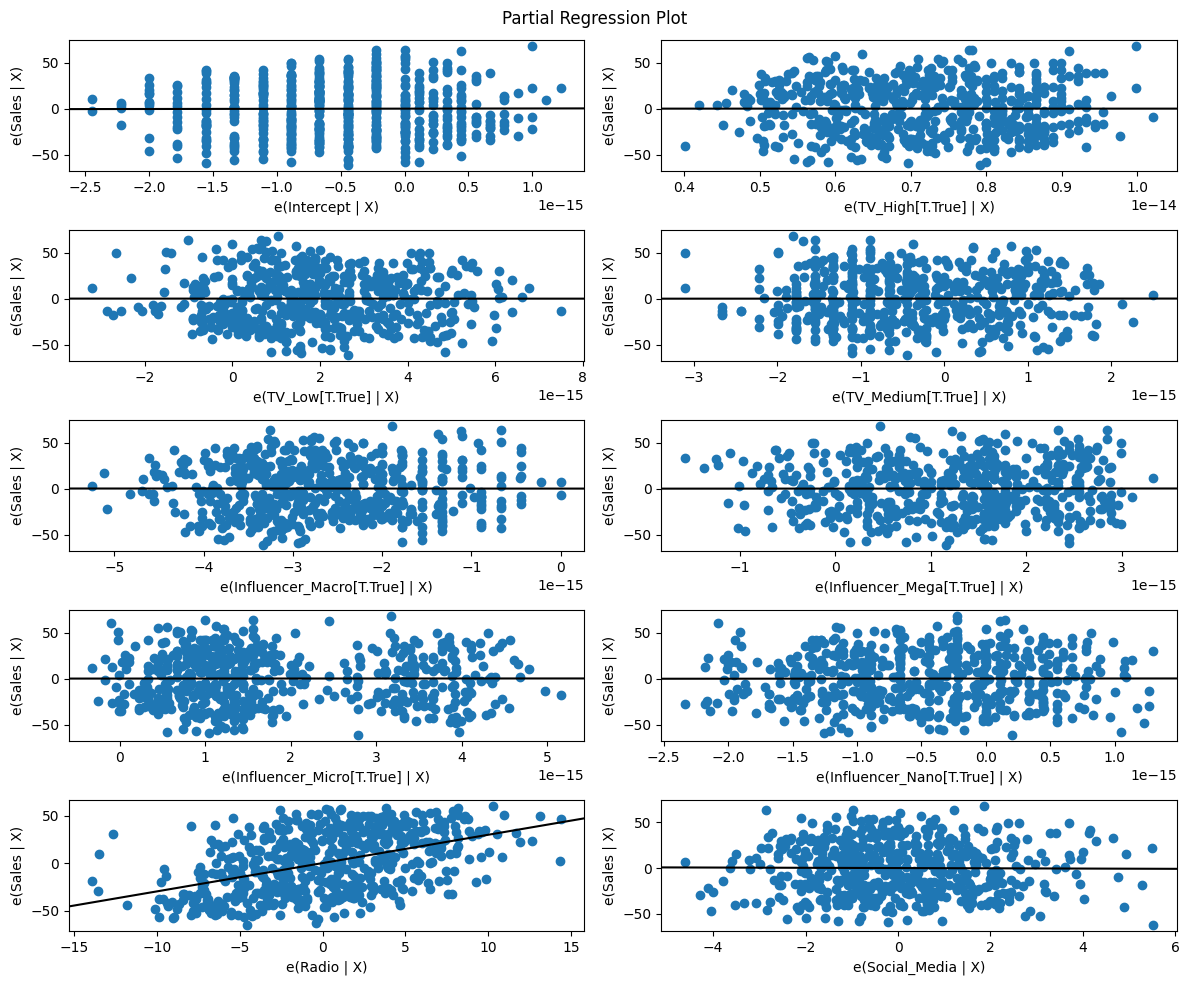

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


target = "Sales"
predictors = ["Radio", "Social_Media", "TV_High", "TV_Low", "TV_Medium",
              "Influencer_Macro", "Influencer_Mega", "Influencer_Micro", "Influencer_Nano"]

# Fit the OLS model
formula = f"{target} ~ {' + '.join(predictors)}"
model = smf.ols(formula=formula, data=data).fit()

# Create partial regression plots (scatterplots for linearity)
fig = plt.figure(figsize=(12, 10))
sm.graphics.plot_partregress_grid(model, fig=fig)

plt.show()


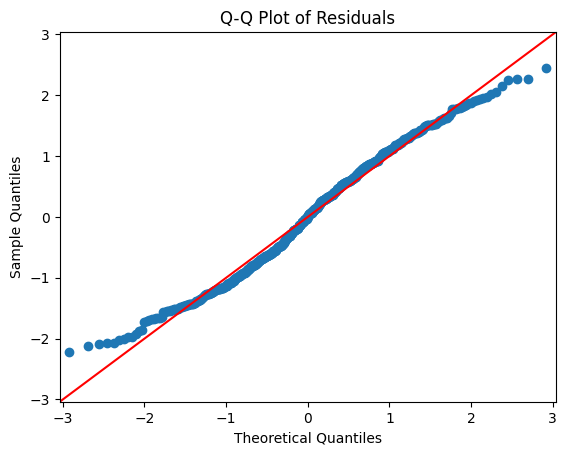

In [21]:
# Calculate residuals
residuals = model.resid

# Create Q-Q plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()


## Step 7: Results and Interpretation
### Task:
Interpret the model results, including the R-squared value, coefficients, and their statistical significance.

### Mini-task:
Display the model summary and interpret the coefficients.

#### Hint:
Use `model.summary()` to display the model results and interpret the coefficients.

```python
# Display the model summary
### YOUR CODE HERE ###

# Interpret the coefficients
### YOUR CODE HERE ###
```

---

In [26]:
# Display the model summary
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Mon, 31 Mar 2025   Prob (F-statistic):          1.82e-282
Time:                        06:47:16   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In as mush the interpretation is abit difficut for me but here are my key takaway
> R-squared: 0.904 → The model explains 90.4% of the variance in Sales, meaning it fits the data well

This regression model predicts Sales based on advertising channels (TV, Radio, Social Media) and influencer categories (Macro, Mega, Micro, Nano). Below is an analysis of the key findings:

## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of checking regression assumptions and interpreting model coefficients.
- Consider how the model's insights can be used to optimize marketing strategies.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key metrics.
- Discuss the impact of different marketing strategies on sales.

**What would you share with and recommend to stakeholders?**
- Highlight the key factors that contribute most to sales.
- Recommend strategies to optimize marketing efforts based on the model's insights.

**What are some key takeaways you learned from this project**

* High TV advertising significantly boosts sales (+106.68 units), while low TV advertising has a negative impact (-47.88 units)

* All influencer categories (Macro, Mega, Micro, Nano) positively impact sales.

* Interestingly, Micro-influencers have the highest effect (+23.85 units), slightly more than Mega-influencers.

* The coefficient for Social Media is not statistically significant (p = 0.837) so Social Media might not be driving sales